In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
import random
import seaborn as sns

In [31]:
nasdaq_df = pd.read_csv('./nasdaq.csv')

In [44]:
nasdaq_df.head(3)

,Date,Close/Last,Volume,Open,High,Low
2515,01/02/2013,2746.47,0,2660.93,2746.50,2716.30
2514,01/02/2014,3563.57,0,3575.60,3577.03,3553.65
2513,01/02/2015,4230.24,0,4258.60,4276.71,4206.46


In [33]:
nasdaq_df.shape

(2516, 6)

In [35]:
nasdaq_df = nasdaq_df.sort_values("Date")

In [61]:
nasdaq_df[" Close/Last"]

2515    2746.47
2514    3563.57
2513    4230.24
2512    6511.34
2511    6360.87
2510    8872.22
2509    2254.23
2508    2321.96
2507    2732.26
2506    3538.73
2505    4911.33
2504    6575.80
2503    6147.13
2502    8793.90
2501    2251.46
2500    2329.71
2499    2724.49
2498    4497.86
2497    4937.20
2496    6584.58
2495    6422.67
2494    2270.40
2493    2348.98
2492    4160.96
2491    4484.18
2490    4964.95
2489    6653.29
2488    1878.42
2487    2277.51
2486    2356.17
         ...   
29      6435.15
28      6288.30
27      8770.98
26      2227.42
25      2267.08
24      2606.36
23      4621.35
22      4926.29
21      6441.42
20      6285.27
19      2231.64
18      2285.07
17      4312.64
16      4691.08
15      4918.28
14      6396.42
13      2225.72
12      2277.83
11      3570.08
10      4282.35
9       4652.01
8       4863.62
7       8709.73
6       2217.86
5       2660.93
4       3592.00
3       4236.28
2       4593.27
1       6329.96
0       8733.07
Name:  Close/Last, Lengt

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


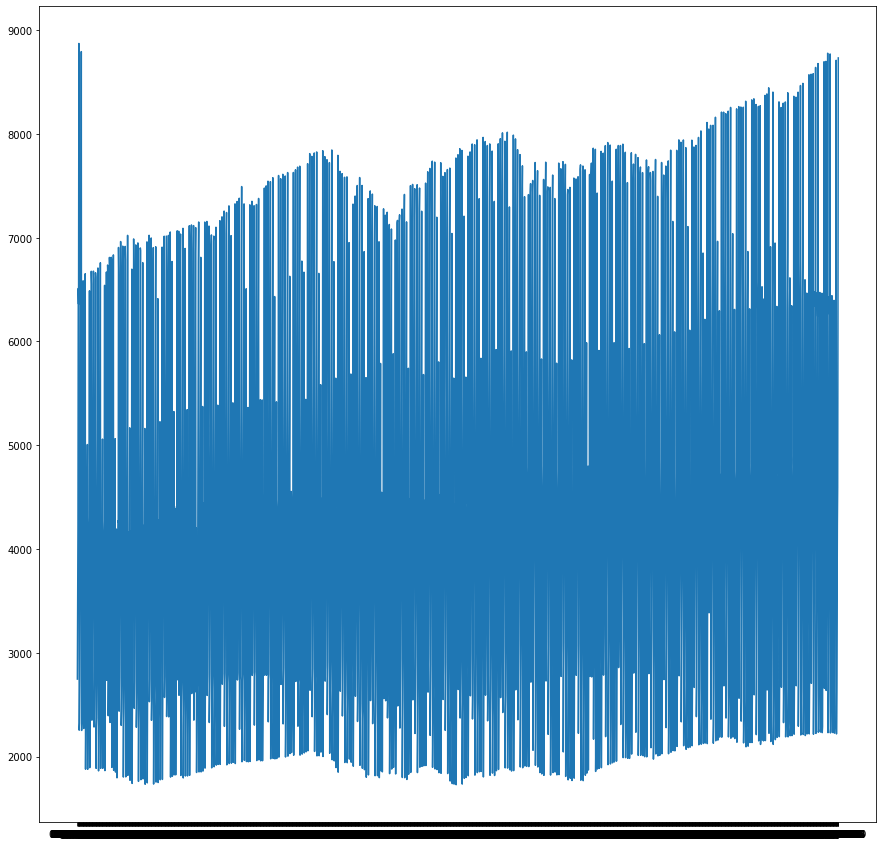

In [62]:
plt.figure(figsize = (15,15))
plt.plot(nasdaq_df["Date"], nasdaq_df[" Close/Last"])

In [63]:
nasdaq_prophet_df = nasdaq_df[["Date", ' Close/Last']]

<h2> making readable Date column format

In [68]:
nasdaq_prophet_df["Date"] = pd.to_datetime(nasdaq_prophet_df.Date)

In [71]:
nasdaq_prophet_df = nasdaq_prophet_df.sort_values("Date")

In [72]:
nasdaq_prophet_df

,Date,Close/Last
2488,2010-01-06,1878.42
2481,2010-01-07,1876.72
2474,2010-01-08,1892.59
2453,2010-01-11,1886.24
2445,2010-01-12,1861.79
2438,2010-01-13,1886.13
2431,2010-01-14,1886.52
2424,2010-01-15,1864.52
2401,2010-01-19,1895.48
2395,2010-01-20,1867.95


In [74]:
m = Prophet()

In [76]:
nasdaq_prophet_df = nasdaq_prophet_df.rename(columns={'Date':'ds', ' Close/Last':'y'})

In [77]:
m.fit(nasdaq_prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [83]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2010-01-06,1831.647254,1831.647254,1831.647254,1506.492163,2011.493700,-77.288568,-77.288568,-77.288568,0.0,0.0,0.0,-9.525577,-9.525577,-9.525577,-67.762991,-67.762991,-67.762991,1754.358686
1,2010-01-07,1832.232228,1832.232228,1832.232228,1517.822922,1977.034630,-73.335615,-73.335615,-73.335615,0.0,0.0,0.0,-6.216514,-6.216514,-6.216514,-67.119101,-67.119101,-67.119101,1758.896613
2,2010-01-08,1832.817203,1832.817203,1832.817203,1521.541490,1997.595022,-74.052884,-74.052884,-74.052884,0.0,0.0,0.0,-7.721064,-7.721064,-7.721064,-66.331820,-66.331820,-66.331820,1758.764320
3,2010-01-11,1834.572128,1834.572128,1834.572128,1519.137167,1973.911043,-75.280809,-75.280809,-75.280809,0.0,0.0,0.0,-11.678675,-11.678675,-11.678675,-63.602133,-63.602133,-63.602133,1759.291319
4,2010-01-12,1835.157103,1835.157103,1835.157103,1530.410400,2008.894254,-67.704542,-67.704542,-67.704542,0.0,0.0,0.0,-4.973347,-4.973347,-4.973347,-62.731195,-62.731195,-62.731195,1767.452561
5,2010-01-13,1835.742077,1835.742077,1835.742077,1549.642844,1995.486630,-71.479982,-71.479982,-71.479982,0.0,0.0,0.0,-9.525577,-9.525577,-9.525577,-61.954406,-61.954406,-61.954406,1764.262095
6,2010-01-14,1836.327052,1836.327052,1836.327052,1534.184693,2003.746740,-67.526738,-67.526738,-67.526738,0.0,0.0,0.0,-6.216514,-6.216514,-6.216514,-61.310224,-61.310224,-61.310224,1768.800314
7,2010-01-15,1836.912027,1836.912027,1836.912027,1532.283170,2032.814272,-68.552389,-68.552389,-68.552389,0.0,0.0,0.0,-7.721064,-7.721064,-7.721064,-60.831325,-60.831325,-60.831325,1768.359638
8,2010-01-19,1839.251926,1839.251926,1839.251926,1540.130569,2011.073342,-65.947845,-65.947845,-65.947845,0.0,0.0,0.0,-4.973347,-4.973347,-4.973347,-60.974498,-60.974498,-60.974498,1773.304082
9,2010-01-20,1839.836901,1839.836901,1839.836901,1535.172470,1995.084675,-71.083134,-71.083134,-71.083134,0.0,0.0,0.0,-9.525577,-9.525577,-9.525577,-61.557557,-61.557557,-61.557557,1768.753767


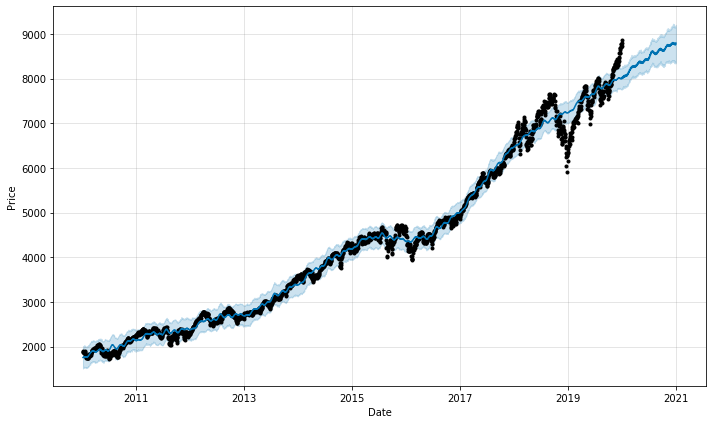

In [84]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

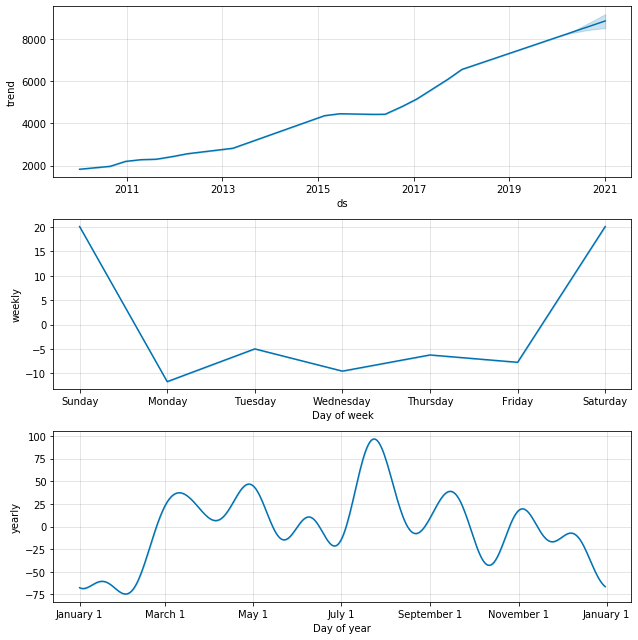

In [85]:
figure = m.plot_components(forecast)